<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_Project/blob/main/it21395first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries we need

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

Importing dataset (.csv file)

In [3]:
url = "https://raw.githubusercontent.com/Niroth36/Machine_Learning_Project/main/fetal_health.csv"
dataset = pd.read_csv(url)
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

Total number of columns and raws

In [4]:
dataset.shape

(2126, 22)

Checking data (5 first lines)

In [5]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Checking data type of dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Descriptive statistics for the dataset and .T to change raws with columns and the opposite

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Depecting the counts of observations for the three values of fetal_health column to see if the dataset is balanced.

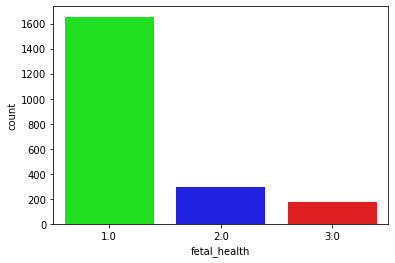

In [78]:
colours=["#00FF00","#0000FF", "#FF0000"]
sns.countplot(data= dataset, x="fetal_health",palette=colours)

In this case as the countplot shows we have an imbalanced data and this could lead to misleading classification accuracy. So we are going to use some performance measures to give us a better insight, such as:
- Correlation Matrix
- Precision
- Recall
- F1 score

In this case we will use only the correlation matrix.

Drawing boxplot for every characteristic of the dataset.

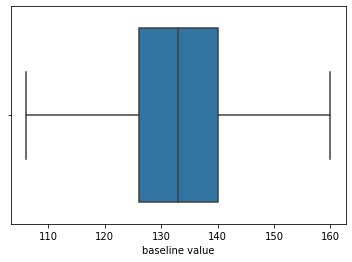

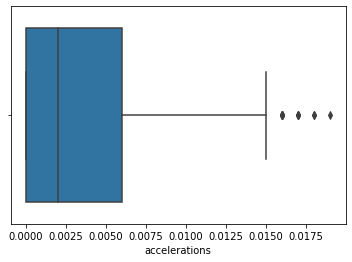

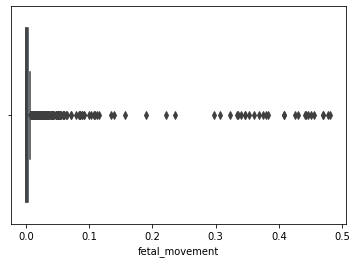

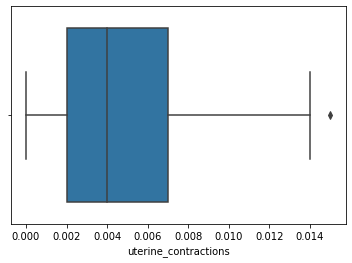

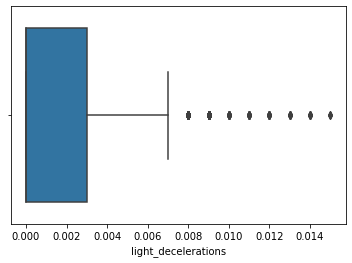

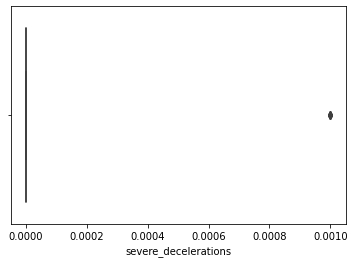

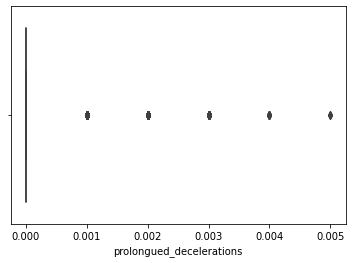

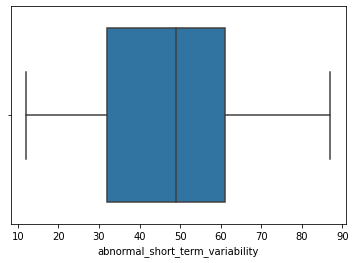

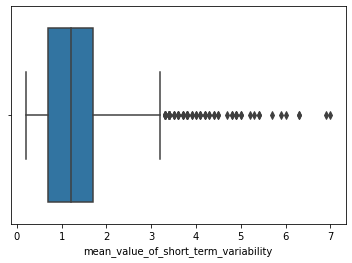

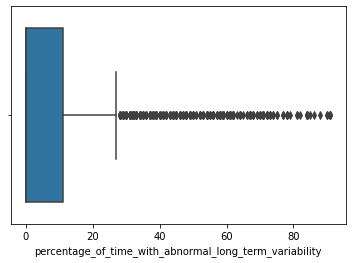

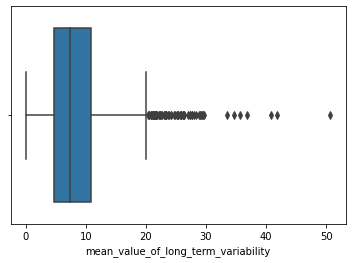

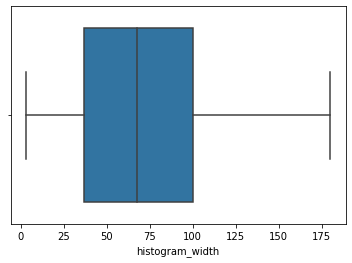

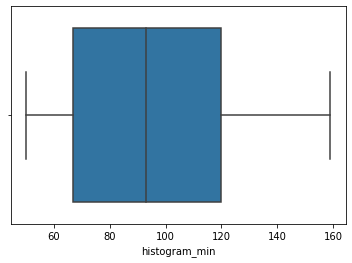

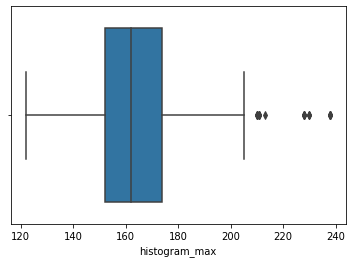

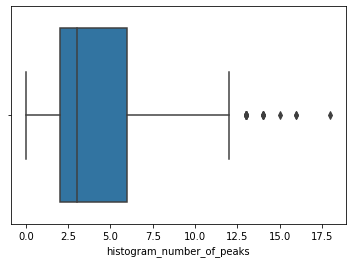

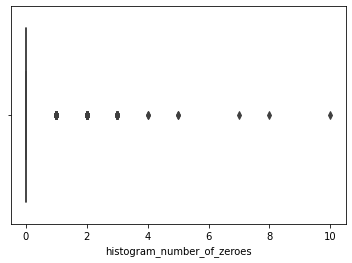

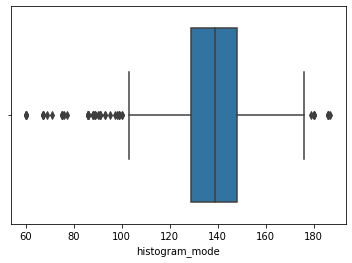

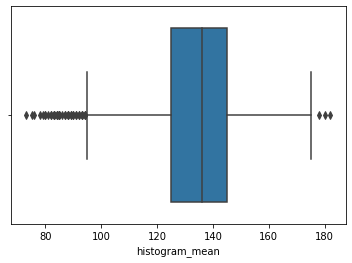

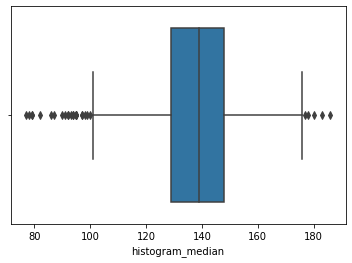

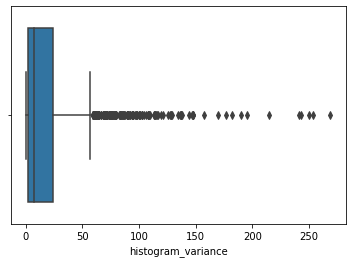

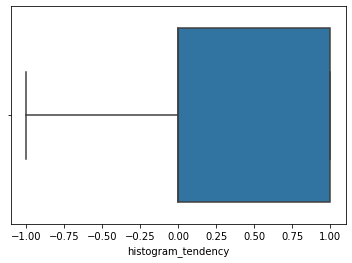

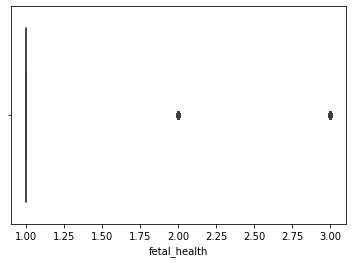

In [89]:
# sns.boxplot(data = dataset, x = 'abnormal_short_term_variability', y = 'fetal_health')
for column in dataset.columns:
  plt.figure()
  plt.tight_layout()
  sns.boxplot(x=dataset[column])
  plt.show()
  # sns.histplot(x=dataset[column])

Producing histogram for all the characteristics of the dataset.

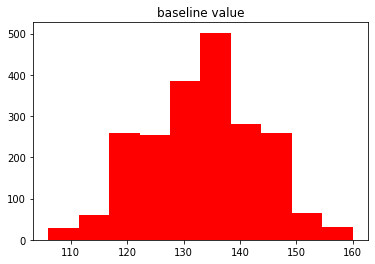

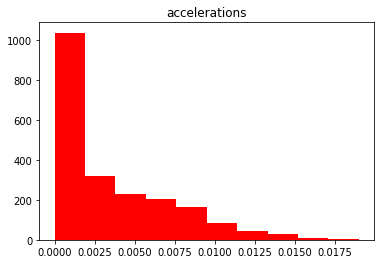

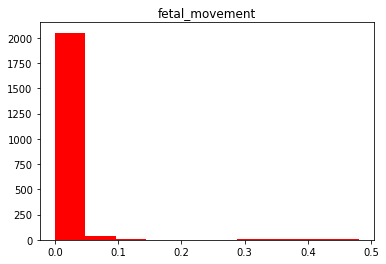

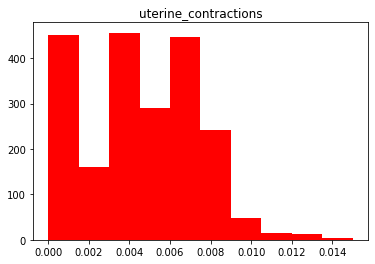

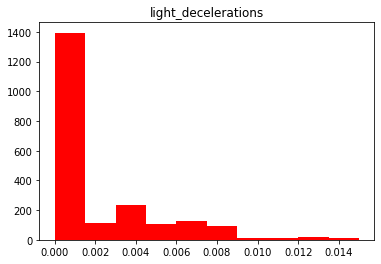

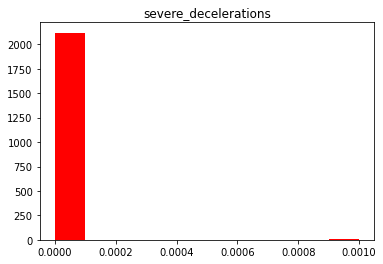

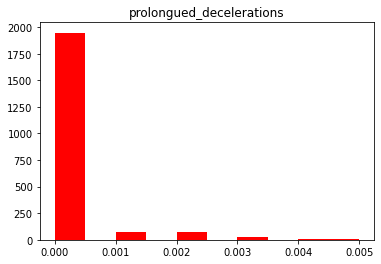

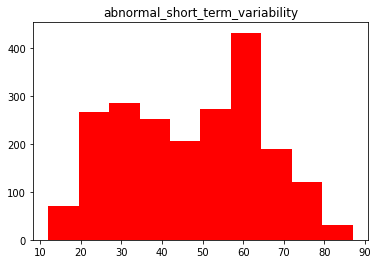

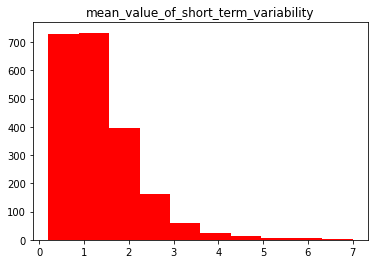

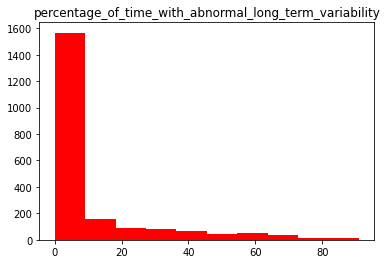

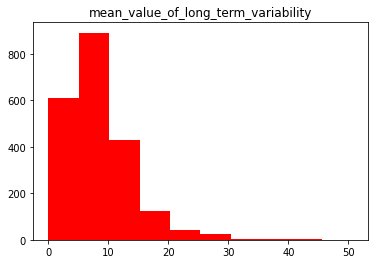

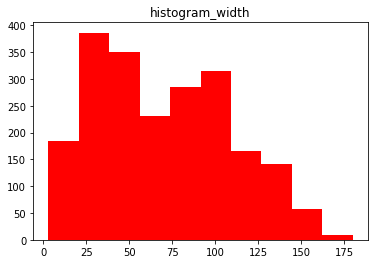

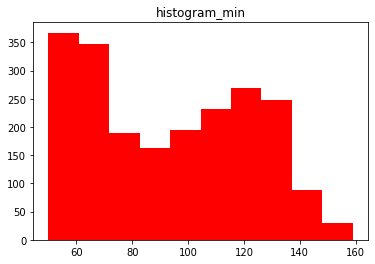

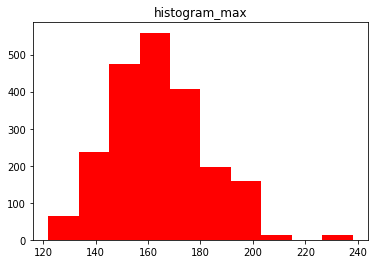

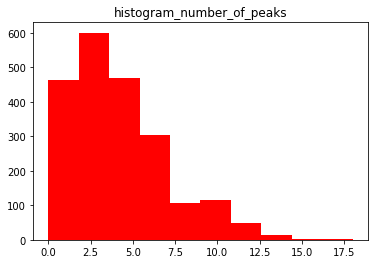

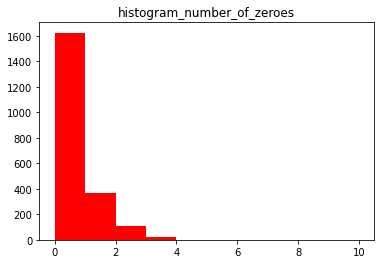

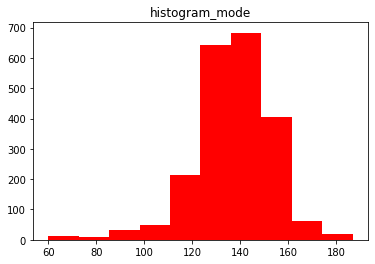

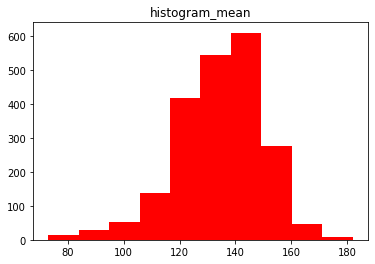

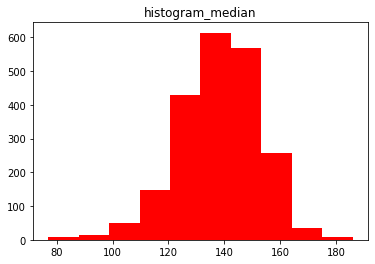

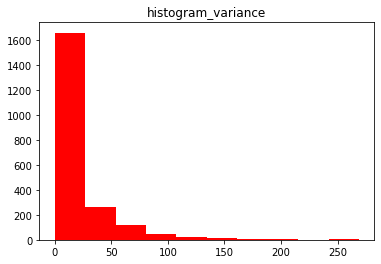

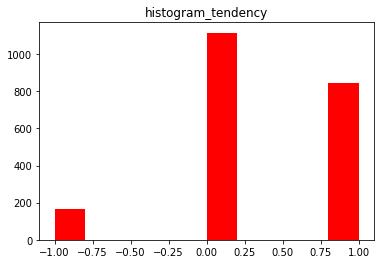

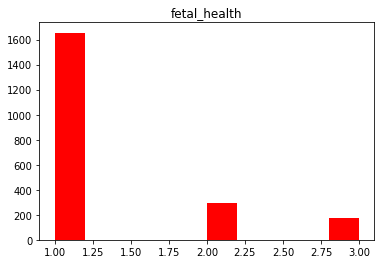

In [87]:
for column in dataset.columns:
  plt.hist(x=dataset[column], color = 'red')
  plt.title(column)
  plt.show()

Calculating correlation matrix.

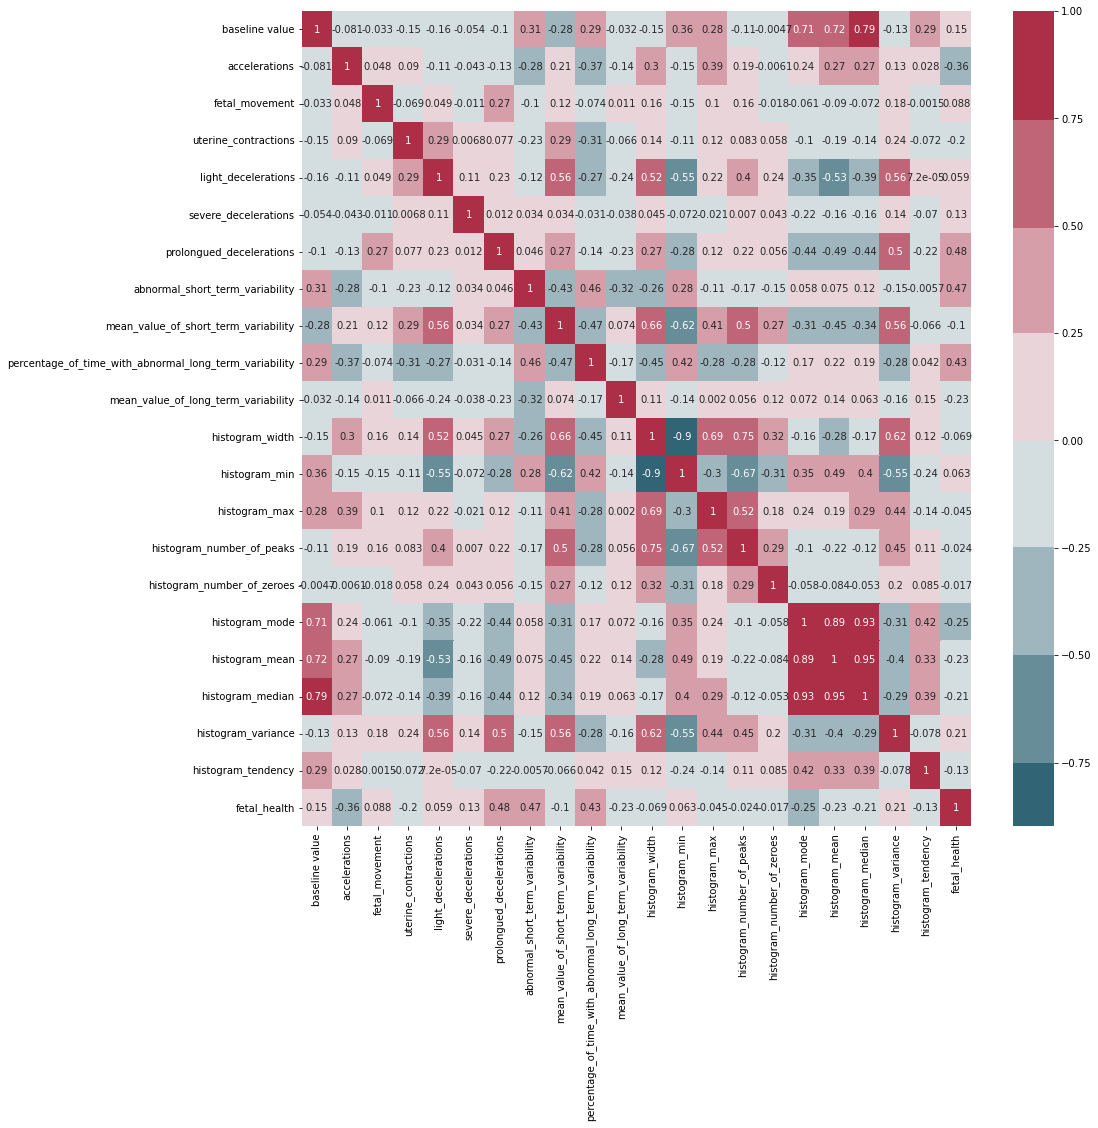

In [58]:
corrmat= dataset.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(220, 5, s=75, l=40, n=8, center = "light", as_cmap=False)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Checking if there are null values in the dataset

In [10]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Visualizing data completeness. Because all columns have value 1.0 in y-axis this means that they have 100% data completeness.

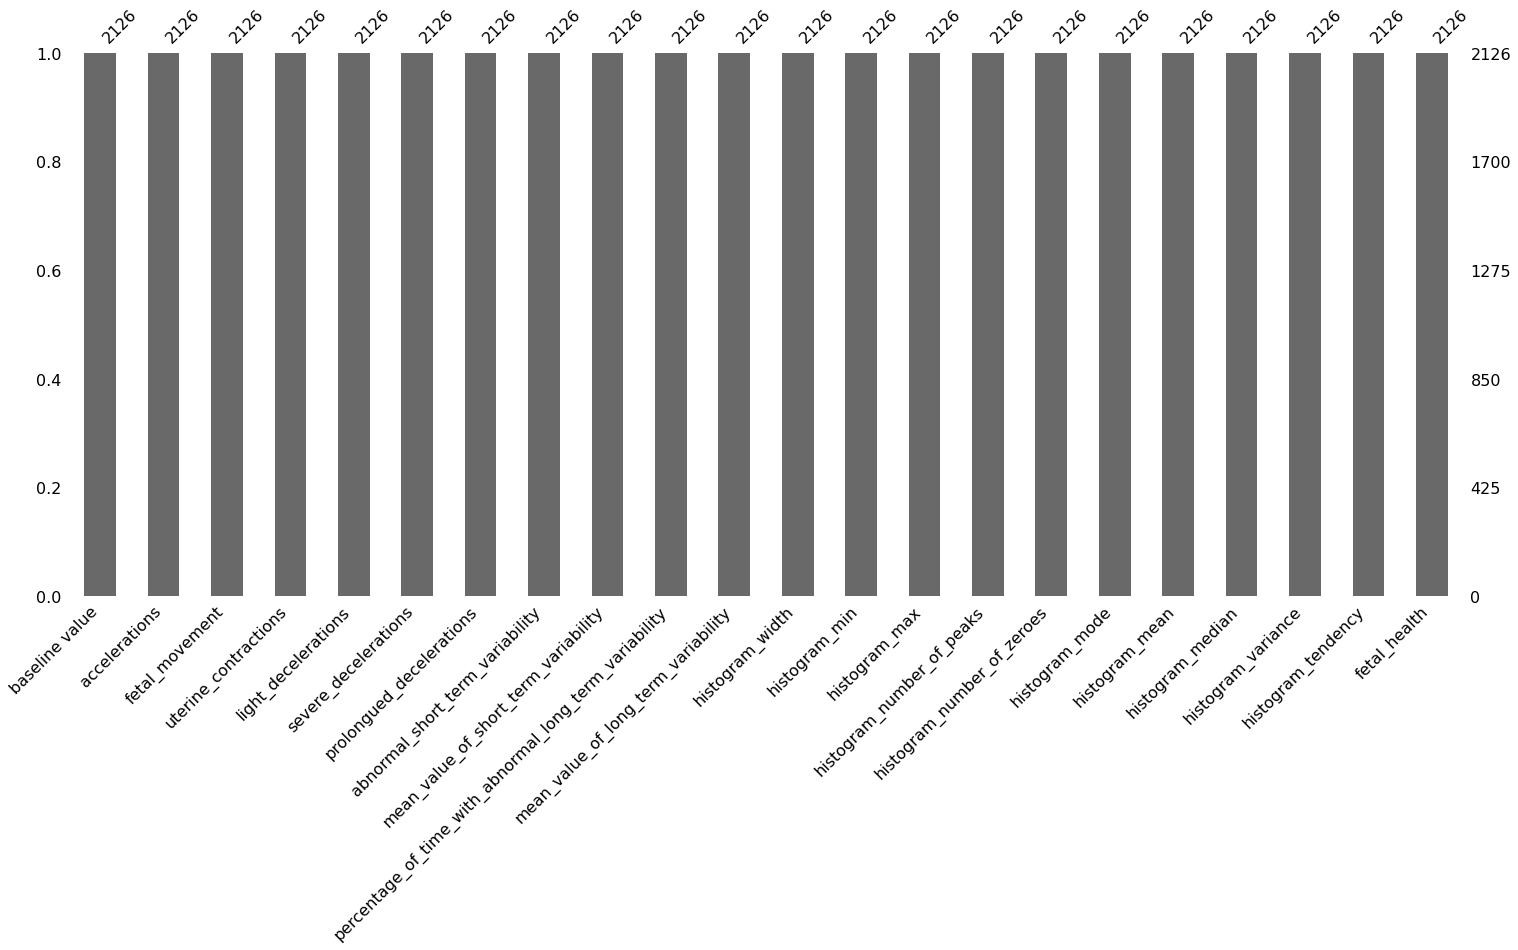

In [59]:
import missingno as msno
msno.bar(dataset)

Data is colored and there are no white spaces. That means that there is 100% data completeness.

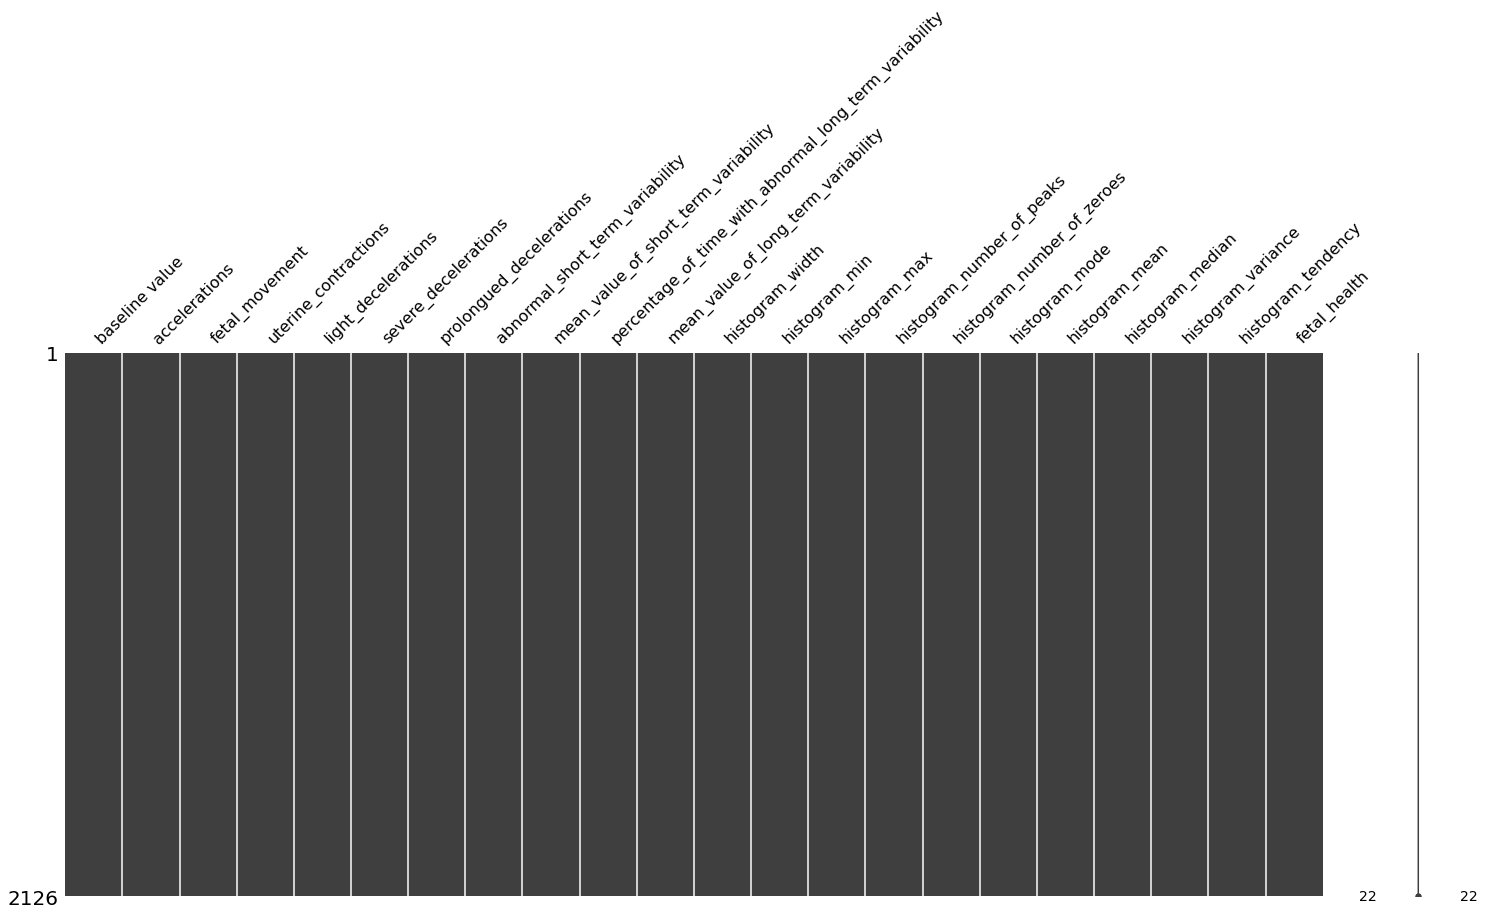

In [63]:
msno.matrix(dataset)